<a href="https://colab.research.google.com/github/ferdoneh/mycobacterium_tuberculosis/blob/main/experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Exploration**

In [1]:
import pandas as pd
! pip install sklearn.model_selection 
import numpy as np
import re
import datetime
from math import sqrt

import cufflinks as cf
import plotly.graph_objs as go
! pip install fingertips_py

from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
import csv
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fingertips_py: filename=fingertips_py-0.2.2-py3-none-any.whl size=9774 sha256=e4e671a71c4890d1fc7fee727ed281af16a7f63020fc2d7c7f998a4d30509e32
  Stored in directory: /root/.cache/pip/wheels/40/1c/9f/c6d113478bcb197541e469281d9bdebfe3975f447d66072f15
Successfully built fingertips_py


In [2]:
! pip install encoding

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement encoding (from versions: none)
ERROR: No matching distribution found for encoding


In [3]:
import fingertips_py as ftp

In [4]:
!help(*fingertips_py function name*)

/bin/bash: -c: line 0: syntax error near unexpected token `*fingertips_py'
/bin/bash: -c: line 0: `help(*fingertips_py function name*)'


In [5]:
!git clone https://github.com/ferdoneh/mycobacterium_tuberculosis.git
# df = pd.read_excel("/content/mycobacterium_tuberculosis/60pages.xlsx")
df1 = pd.read_csv("/content/mycobacterium_tuberculosis/BVBRC_genome.csv")
df2 = pd.read_csv("/content/mycobacterium_tuberculosis/BVBRC_genome_amr.csv")

Cloning into 'mycobacterium_tuberculosis'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 9), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (26/26), done.


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (16,18,19,31,45,73,81) have mixed types.Specify dtype option on import or set low_memory=False.



In [6]:
df1.head()

,Genome ID,Genome Name,Other Names,NCBI Taxon ID,Taxon Lineage IDs,Taxon Lineage Names,Superkingdom,Kingdom,Phylum,Class,...,Host Age,Host Health,Host Group,Lab Host,Passage,Other Clinical,Additional Metadata,Comments,Date Inserted,Date Modified
0,1041522.30,Mycobacterium colombiense CECT 3035,NaN,1041522,131567;2;1783272;201174;1760;85007;1762;1763;1...,cellular organisms;Bacteria;Terrabacteria grou...,Bacteria,Bacteria,Actinobacteria,Actinomycetia,...,NaN,HIV positive,Human,NaN,NaN,NaN,NaN,Mycobacterium colombiense CECT 3035 is the typ...,2014-12-08T22:12:07.364Z,2015-03-16T03:17:09.594Z
1,1087469.30,Mycobacterium abscessus subsp. bolletii INCQS ...,NaN,1087469,131567;2;1783272;201174;1760;85007;1762;670516...,cellular organisms;Bacteria;Terrabacteria grou...,Bacteria,Bacteria,Actinobacteria,Actinomycetia,...,NaN,NaN,Human,NaN,NaN,NaN,NaN,"This organism causes chronic lung infection, s...",2016-01-17T15:30:26.157Z,2016-01-17T15:30:26.157Z
2,110505.50,Mycobacterium heckeshornense strain CTRI-134,NaN,110505,131567;2;1783272;201174;1760;85007;1762;1763;1...,cellular organisms;Bacteria;Terrabacteria grou...,Bacteria,Bacteria,Actinobacteria,Actinomycetia,...,NaN,mycobacteriosis,Human,NaN,NaN,NaN,collected_by:Central Tuberculosis Research Ins...,WGS study of clinically relevant Mycobacterium...,2017-01-16T03:13:04.037Z,2017-01-16T03:13:04.037Z
3,115862.23,Mycobacterium tuberculosis variant caprae stra...,NaN,115862,131567;2;1783272;201174;1760;85007;1762;1763;7...,cellular organisms;Bacteria;Terrabacteria grou...,Bacteria,Bacteria,Actinobacteria,Actinomycetia,...,NaN,Tuberculosis,Human,NaN,NaN,NaN,collected_by:D van Soolingen,"Mycobacterium caprae, strain NLA000201913 was ...",2020-06-04T09:55:49.859Z,2020-06-04T09:55:49.859Z
4,115862.25,Mycobacterium tuberculosis variant caprae stra...,NaN,115862,131567;2;1783272;201174;1760;85007;1762;1763;7...,cellular organisms;Bacteria;Terrabacteria grou...,Bacteria,Bacteria,Actinobacteria,Actinomycetia,...,NaN,Tuberculosis,Human,NaN,NaN,NaN,NaN,The aim of this study is to sequence and analy...,2020-07-02T02:41:10.638Z,2020-07-02T02:41:10.638Z


In [7]:
df2.head()

,Taxon ID,Genome ID,Genome Name,Antibiotic,Resistant Phenotype,Measurement,Measurement Sign,Measurement Value,Measurement Unit,Laboratory Typing Method,...,Laboratory Typing Platform,Vendor,Testing Standard,Testing Standard Year,Computational Method,Computational Method Version,Computational Method Performance,Evidence,Source,PubMed
0,1773,1733.52000,Mycobacterium tuberculosis 16.0617651,ofloxacin,Susceptible,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,AdaBoost Classifier,NaN,"Accuracy:0.790, F1 score:0.771, AUC:0.855",Computational Method,NaN,NaN
1,1773,1733.10022,Mycobacterium tuberculosis 04s099,ethambutol,Susceptible,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,AdaBoost Classifier,NaN,"Accuracy:0.670, F1 score:0.695, AUC:0.730",Computational Method,NaN,NaN
2,1773,1773.20463,Mycobacterium tuberculosis ERR1035028,ethambutol,Susceptible,NaN,NaN,NaN,NaN,NaN,...,NaN,PATRIC,NaN,NaN,AdaBoost Classifier,NaN,"Accuracy:0.670, F1 score:0.695, AUC:0.730",Computational Method,NaN,NaN
3,1773,1733.29630,Mycobacterium tuberculosis Italy_MGIT109,ethambutol,Susceptible,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,AdaBoost Classifier,NaN,"Accuracy:0.670, F1 score:0.695, AUC:0.730",Computational Method,NaN,NaN
4,1773,1773.19040,Mycobacterium tuberculosis ERR161193,isoniazid,Susceptible,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,WHO: Guidelines for Surveillance of Drug Resis...,2009.0,NaN,NaN,NaN,Laboratory Method,NaN,29358649


In [8]:
df = pd.merge(df1, df2, on="Genome ID")
df.head()

,Genome ID,Genome Name_x,Other Names,NCBI Taxon ID,Taxon Lineage IDs,Taxon Lineage Names,Superkingdom,Kingdom,Phylum,Class,...,Laboratory Typing Platform,Vendor,Testing Standard,Testing Standard Year,Computational Method,Computational Method Version,Computational Method Performance,Evidence,Source,PubMed
0,115862.23,Mycobacterium tuberculosis variant caprae stra...,NaN,115862,131567;2;1783272;201174;1760;85007;1762;1763;7...,cellular organisms;Bacteria;Terrabacteria grou...,Bacteria,Bacteria,Actinobacteria,Actinomycetia,...,NaN,PATRIC,NaN,NaN,AdaBoost Classifier,NaN,"Accuracy:0.670, F1 score:0.695, AUC:0.730",Computational Method,NaN,NaN
1,115862.23,Mycobacterium tuberculosis variant caprae stra...,NaN,115862,131567;2;1783272;201174;1760;85007;1762;1763;7...,cellular organisms;Bacteria;Terrabacteria grou...,Bacteria,Bacteria,Actinobacteria,Actinomycetia,...,NaN,PATRIC,NaN,NaN,AdaBoost Classifier,NaN,"Accuracy:0.790, F1 score:0.771, AUC:0.855",Computational Method,NaN,NaN
2,115862.23,Mycobacterium tuberculosis variant caprae stra...,NaN,115862,131567;2;1783272;201174;1760;85007;1762;1763;7...,cellular organisms;Bacteria;Terrabacteria grou...,Bacteria,Bacteria,Actinobacteria,Actinomycetia,...,NaN,PATRIC,NaN,NaN,AdaBoost Classifier,NaN,"Accuracy:0.843, F1 score:0.838, AUC:0.905",Computational Method,NaN,NaN
3,115862.23,Mycobacterium tuberculosis variant caprae stra...,NaN,115862,131567;2;1783272;201174;1760;85007;1762;1763;7...,cellular organisms;Bacteria;Terrabacteria grou...,Bacteria,Bacteria,Actinobacteria,Actinomycetia,...,NaN,PATRIC,NaN,NaN,AdaBoost Classifier,NaN,"Accuracy:0.831, F1 score:0.844, AUC:0.909",Computational Method,NaN,NaN
4,115862.23,Mycobacterium tuberculosis variant caprae stra...,NaN,115862,131567;2;1783272;201174;1760;85007;1762;1763;7...,cellular organisms;Bacteria;Terrabacteria grou...,Bacteria,Bacteria,Actinobacteria,Actinomycetia,...,NaN,PATRIC,NaN,NaN,AdaBoost Classifier,NaN,"Accuracy:0.747, F1 score:0.754, AUC:0.818",Computational Method,NaN,NaN


In [9]:
#Check the number of columns and row the dataset has.
print(f'The dataset has {df1.shape[1]} columns and {df1.shape[0]} rows.')
print(f'The dataset has {df2.shape[1]} columns and {df2.shape[0]} rows.')
print(f'The dataset has {df.shape[1]} columns and {df.shape[0]} rows.')

The dataset has 87 columns and 17444 rows.
The dataset has 21 columns and 301636 rows.
The dataset has 107 columns and 197089 rows.


In [10]:
df.columns

Index(['Genome ID', 'Genome Name_x', 'Other Names', 'NCBI Taxon ID',
       'Taxon Lineage IDs', 'Taxon Lineage Names', 'Superkingdom', 'Kingdom',
       'Phylum', 'Class',
       ...
       'Laboratory Typing Platform', 'Vendor', 'Testing Standard',
       'Testing Standard Year', 'Computational Method',
       'Computational Method Version', 'Computational Method Performance',
       'Evidence', 'Source', 'PubMed'],
      dtype='object', length=107)

In [11]:
 #Print unique values less than 13.
for i in df.columns:
    if len(df[i].unique()) < 100:
        #Print features with discrete values.
        print(f'{i} has values {df[i].unique()}, {len(df[i].unique())} values total.')

Other Names has values [nan], 1 values total.
Superkingdom has values ['Bacteria'], 1 values total.
Kingdom has values ['Bacteria' nan], 2 values total.
Phylum has values ['Actinobacteria'], 1 values total.
Class has values ['Actinomycetia'], 1 values total.
Order has values ['Corynebacteriales'], 1 values total.
Family has values ['Mycobacteriaceae'], 1 values total.
Genus has values ['Mycobacterium'], 1 values total.
Species has values ['Mycobacterium tuberculosis' 'Mycobacterium colombiense' nan
 'Mycobacterium tuberculosis complex sp. AY1MRC'], 4 values total.
Genome Status has values ['WGS' 'Complete'], 2 values total.
Serovar has values [nan 'Not Collected' 'serovar erdlovskaya' 'MTB1_M'], 4 values total.
Biovar has values [nan], 1 values total.
Pathovar has values [nan 'Not Collected' 'MDR' 'Beijing'], 4 values total.
MLST has values [nan], 1 values total.
Segment has values [nan], 1 values total.
Subtype has values [nan], 1 values total.
H_type has values [nan], 1 values total.

**Features Checking**

The labels of the features to see that they are all present
change label names for  the dataframe.

In [12]:
label = df['Resistant Phenotype']
df = df.drop(columns='Resistant Phenotype')
df["Label"] = label
df.columns

Index(['Genome ID', 'Genome Name_x', 'Other Names', 'NCBI Taxon ID',
       'Taxon Lineage IDs', 'Taxon Lineage Names', 'Superkingdom', 'Kingdom',
       'Phylum', 'Class',
       ...
       'Vendor', 'Testing Standard', 'Testing Standard Year',
       'Computational Method', 'Computational Method Version',
       'Computational Method Performance', 'Evidence', 'Source', 'PubMed',
       'Label'],
      dtype='object', length=107)

In [13]:
df["Label"].unique()

array(['Susceptible', 'Resistant', nan, 'Intermediate'], dtype=object)

In [14]:
df['Host Gender'].unique()

array([nan, 'Female', 'Male', 'male', 'M', 'F', 'female'], dtype=object)

In [15]:
df.columns

Index(['Genome ID', 'Genome Name_x', 'Other Names', 'NCBI Taxon ID',
       'Taxon Lineage IDs', 'Taxon Lineage Names', 'Superkingdom', 'Kingdom',
       'Phylum', 'Class',
       ...
       'Vendor', 'Testing Standard', 'Testing Standard Year',
       'Computational Method', 'Computational Method Version',
       'Computational Method Performance', 'Evidence', 'Source', 'PubMed',
       'Label'],
      dtype='object', length=107)

In [16]:
label = df.iloc[: , -1]
print(label)

0         Susceptible
1         Susceptible
2         Susceptible
3         Susceptible
4         Susceptible
             ...     
197084    Susceptible
197085    Susceptible
197086    Susceptible
197087      Resistant
197088    Susceptible
Name: Label, Length: 197089, dtype: object


**Class Distribution Check the class distribution for imbalance**
The code below shows the percentage of Mycobacterium which resistance toward the antibiotics , it is displaying the data *is imbalanced *

In [17]:
df["Label"].unique()
AM_Resistant = len(df[df.Label == 'Resistant'])
AM_Susceptible = len(df[df.Label == 'Susceptible'])                             
print(f'{round(AM_Resistant/df.shape[0] * 100, 2)}% of AM_resistance.')
print(f'{round(AM_Susceptible/ df.shape[0] * 100, 2)}% of AM_susceptible.')

25.8% of AM_resistance.
68.26% of AM_susceptible.


**Finding the percentage of missing values in the datasete**

Missing Value Check for missing values to see if they need to be filled in as found in the data exploration of the dataset , most of columns have a large amount of missing data. however dropping them from the dataset or even filled them with mean value won't help us to find optimal prediction 

In [18]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +" columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 107 columns and 197089 Rows.
There are 79 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Other Names,0,197089,100.0,197089,100.0,float64
pH1N1-like,0,197089,100.0,197089,100.0,float64
Mat Peptide,0,197089,100.0,197089,100.0,float64
Genome Quality Flags,0,197089,100.0,197089,100.0,float64
Plasmids,0,197089,100.0,197089,100.0,float64
...,...,...,...,...,...,...
Coarse Consistency,0,1235,0.6,1235,0.6,float64
Isolation Country,0,844,0.4,844,0.4,object
RRNA,0,40,0.0,40,0.0,float64
Contig L50,0,16,0.0,16,0.0,float64


In [19]:
# df.drop(['Genome ID'], axis = 1, inplace = True)
 #Check to see if Id has been removed. df.columns
# df.drop(['Serovar','Biovar','MLST','Pathovar','Altitude'], axis = 1, inplace = True)
# df.drop(['Latitude','Longitude', 'Other Environmental', 'Depth','Body Sample Subsite','Reference'], axis = 1, inplace = True)
# df.drop(['PATRIC CDS'], axis = 1, inplace = True)
# df.drop(['NCBI Taxon ID', 'Host Name'], axis = 1, inplace = True)
#list_of_features = ["Geographic Group	","Collection Year","Laboratory Typing Method","SRA Accession","Geographic Location","",,,,,,,,,]

case deleting , 

missing data imputation 


SOM (Self-Organizing Maps) : is a type of artifi cial neural networks


# **Feature Selection**

Putting the unique features into a small datafram

In [20]:
dataFrame = pd.DataFrame(
   {
      "Size","Contigs","Optimal Temperature","Temperature Range","Geographic Group","Antibiotic","Host Health","Species","Host Gender",
                         "Host Age","Host Health","Gram Stain","Cell Shape","Geographic Location","Oxygen Requirement","Label"
   }
)
cols = ["Size","Contigs","Optimal Temperature","Temperature Range","Geographic Group","Antibiotic","Host Health","Species","Host Gender",
                         "Host Age","Host Health","Gram Stain","Cell Shape","Geographic Location","Oxygen Requirement","Label"]
df3 = df.copy()
for i in df3.columns:
  if i not in cols:
    df3.drop(columns=i, inplace=True)

df3.head()
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Size','Chromosome','Plasmids','Contigs','Optimal Temperature',"Temperature Range",'Geographic Group','Antibiotic','Host Health','Species','Host Gender','Host Age','Host Health','Gram Stain','Cell Shape','Geographic Location','Oxygen Requirement','Label'] 
 #naming the dataframe columns
#print(featureScores.nlargest(10,'Score'))


#DF = df['Size','Chromosome','Plasmids','Contigs','Optimal Temperature',"Temperature Range",'Geographic Group','Antibiotic','Host Health','Species','Host Gender','Host Age','Host Health','Gram Stain','Cell Shape','Geographic Location','Oxygen Requirement','Label']
#NDF = pd.DataFrame(newselect)
#NDF.head

,Species,Contigs,Size,Geographic Group,Geographic Location,Host Gender,Host Age,Host Health,Antibiotic,Label
0,Mycobacterium tuberculosis,81,4313720,Europe,Netherlands,NaN,NaN,Tuberculosis,ethambutol,Susceptible
1,Mycobacterium tuberculosis,81,4313720,Europe,Netherlands,NaN,NaN,Tuberculosis,ofloxacin,Susceptible
2,Mycobacterium tuberculosis,81,4313720,Europe,Netherlands,NaN,NaN,Tuberculosis,kanamycin,Susceptible
3,Mycobacterium tuberculosis,81,4313720,Europe,Netherlands,NaN,NaN,Tuberculosis,rifampin,Susceptible
4,Mycobacterium tuberculosis,81,4313720,Europe,Netherlands,NaN,NaN,Tuberculosis,streptomycin,Susceptible


In [21]:
 #Print unique values less than 13.
for i in df3.columns:
    if len(df3[i].unique()) < 100:
        #Print features with discrete values.
        print(f'{i} has values {df3[i].unique()}, {len(df3[i].unique())} values total.')

Species has values ['Mycobacterium tuberculosis' 'Mycobacterium colombiense' nan
 'Mycobacterium tuberculosis complex sp. AY1MRC'], 4 values total.
Geographic Group has values ['Europe' nan 'Africa' 'Asia' 'South America' 'North America' 'Oceania'], 7 values total.
Host Gender has values [nan 'Female' 'Male' 'male' 'M' 'F' 'female'], 7 values total.
Host Age has values [nan '27' '56' '61' '39' '26' '45' '32' '53' '48' '33' '44' '28' '36' '31'
 '30' '23' '20' '40' '41' '25' '50' '42' '37' '21' '43' '38' '34' '24'
 '58' '62' '74' '54' '14' '70' '57' '35' '69' '22' '19' '18' '29' '49'
 '52' '47' '46' '78' 'Adult' '17' '16' '59' '60' '55' '51' '72' '79' '63'
 '67' '15' '8' '90' '3 yr' '33y' '75' '68' '>=18' '<18' '27 years old'
 '11 years old' '65 years' '5' '23 Years' '4 months' '8 months 1o days'], 74 values total.
Host Health has values ['Tuberculosis' nan 'TB' 'MDR-TB' 'XDR-TB' 'pleural disease'
 'brain lesion' 'tuberculosis' 'pulmonary tuberculosis'
 'extrapulmonary tuberculosis' 'inf

In [22]:
dataFrame.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Cell Shape,Host Age,Label,Contigs,Optimal Temperature,Temperature Range,Geographic Group,Host Gender,Oxygen Requirement,Geographic Location,Gram Stain,Host Health,Antibiotic,Size,Species


# ***Changing Lable to binary ***

The lable of the dataset has the value of 'Resistant' and 'Susceptible' .it would be necessary to change them to the value of 0 for 'Resistant' and 1 for 'Susceptible'

In [23]:
# creating a function to change the lable to a binary 0 and 1 
def Lablechange(Lable):
  if Lable == 'Resistant':
    return 0 
  elif Lable == 'Susceptible':
    return 1
  else :
    return None
    
    df3["Label"] = df3["Label"].apply(Lablechange)
    newDf["Label"] = newDf["Label"].apply(Lablechange)


In [24]:
hgs = df3['Host Gender'].to_list()
def Host_GenderChanges(hgs):
  if hgs == 'Male' or hgs == 'male' or hgs == 'M':
    return 'Male'
  elif hgs == 'Female' or hgs == 'female' or hgs == 'F':
    return 'Female'
  else :
    return 'Unknown'

# applying the change to the gender coloumn
df3['Host Gender'] = df3['Host Gender'].apply(Host_GenderChanges) 

Gender = df3['Host Gender']

# creating a function to change the 'Host Gender' to a binary 0 and 1 

def Host_GenderChanges(Gender):
  if Gender == 'Male':
    return 0 
  elif Gender == 'Female':
    return 1
  elif Gender == 'Unknown':
    return 2
  else :
    return Non
Gender = df3['Host Gender'].apply(Host_GenderChanges)
Gender.unique()

  

array([2, 1, 0])

# **Visualise frequency distribution.**



In [25]:
df3['Host Age'].value_counts()
# df['Host Age New'] = ['<18'  in x else '>=18 for x in idx]
idx =[]
for idx, i in enumerate(df3['Host Age']):
  if df3['Host Age'][idx] != "nan":
    if type(df3['Host Age'][idx]) != str:
      print(type(df3['Host Age'][idx]))
      if df3['Host Age'][idx] >=18:
        df3['Host Age'][idx] = '>=18'
      elif df3['Host Age'][idx] <18:
        df3['Host Age'][idx] = '<18'
        print("HIIIIIIIII")
    elif type(df3['Host Age'][idx]) == str:
      if "month" in df3['Host Age'][idx]:
        df3['Host Age'][idx] = '<18'
      elif '<18' in df3['Host Age'][idx]:
          df3['Host Age'][idx] = '<18'
      # elif df['Host Age'][idx] == ">=18":
      else:
        df3['Host Age'][idx] = '>=18'
      # elif "month" not in df['Host Age'][idx]:
      #   df['Host Age'][idx] = ">=18"

  else:
    continue


      # elif df['Host Age'][idx] == "Adult":
      #   df['Host Age'][idx] = ">=18"
      # elif df['Host Age'][idx] == "33y":
      #   df['Host Age'][idx] = ">=18"
      # elif df['Host Age'][idx] == "4 months":
      #   df['Host Age'][idx] = "<18"
      # elif df['Host Age'][idx] == "8 months 1o days":
      #   df['Host Age'][idx] = "<18"

  
  # s.rename({1: 3, 2: 5})
# s = s.apply(lambda x: '>=18' if (x >= 18) else '<18')
# s.unique()

df3['Host Age'].value_counts()
df3['Host Age'] = df3['Host Age'].replace('Adult','>=18')
print(df3)

Streaming output truncated to the last 5000 lines.
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<clas

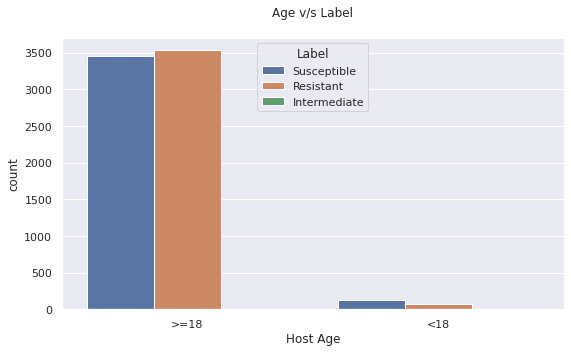

In [26]:
sns.set(rc={'figure.figsize':(9,5)})
sns.countplot(data= df3, x='Host Age',hue='Label')
plt.title('Age v/s Label\n')
plt.show()

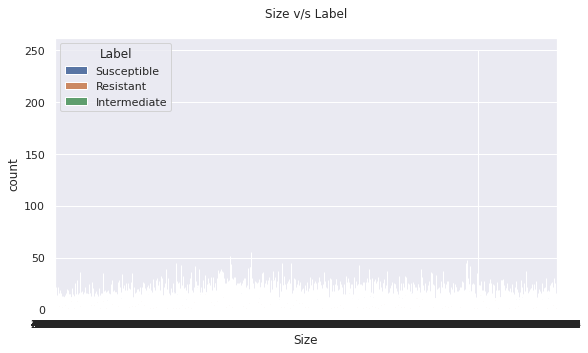

In [27]:
sns.set(rc={'figure.figsize':(9,5)})
sns.countplot(data= df3, x='Size',hue='Label')
plt.title('Size v/s Label\n')
plt.show()

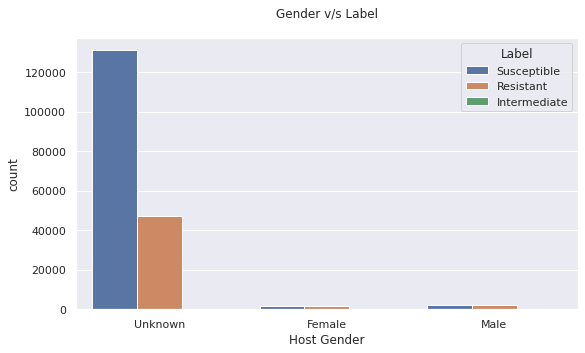

In [28]:
sns.set(rc={'figure.figsize':(9,5)})
sns.countplot(data= df3, x=df3['Host Gender'],hue='Label')
plt.title('Gender v/s Label\n')
plt.show()

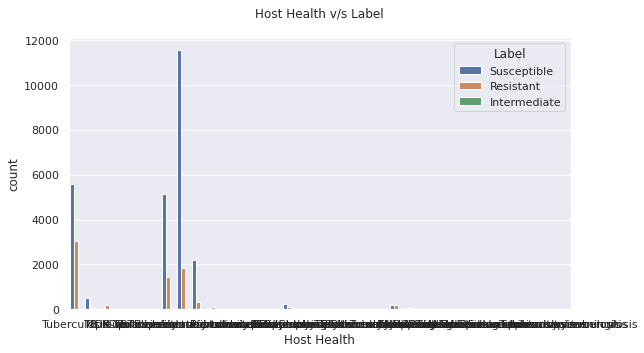

In [29]:
sns.set(rc={'figure.figsize':(9,5)})
sns.countplot(data= df3, x=df3['Host Health'],hue='Label')
plt.title('Host Health v/s Label\n')
plt.show()

In [30]:
df3["Geographic Location"].unique()

array(['Netherlands', nan, 'South Africa: King George V Hospital, Durban',
       'Malaysia: Selangor', 'South Africa: Prince Msheyeni',
       'South Africa: Nkandla', 'South Africa: Rietvlei',
       'South Africa: Stanger', 'South Africa: Escourt',
       'South Africa: Ladysmith',
       'South Africa: Charles Johnson Memorial', 'South Africa: Greytown',
       'South Africa: Mahatma Gandhi', 'South Africa: Madadeni',
       'South Africa: Eshowe', 'South Africa: Hlabisa',
       'South Africa: Edendale', 'South Africa: Ngwelezane',
       'South Africa: Saint Margaret', 'United States',
       'Mali: Point G Hospital, Bamako', 'Mali: Point G Hospital',
       'South Africa', 'South Africa: Durban', 'South Africa: Amatikulu',
       'Kenya: Kericho', 'South Africa: Pietermaritzburg',
       'India: Warangal', 'South Africa: Kwazulu Natal',
       'South Africa: Kwangwanase', 'South Korea', 'Taiwan', 'Uganda',
       'Colombia: Buenaventura, Valle del Cauca', 'Sweden', 'Belarus',
  

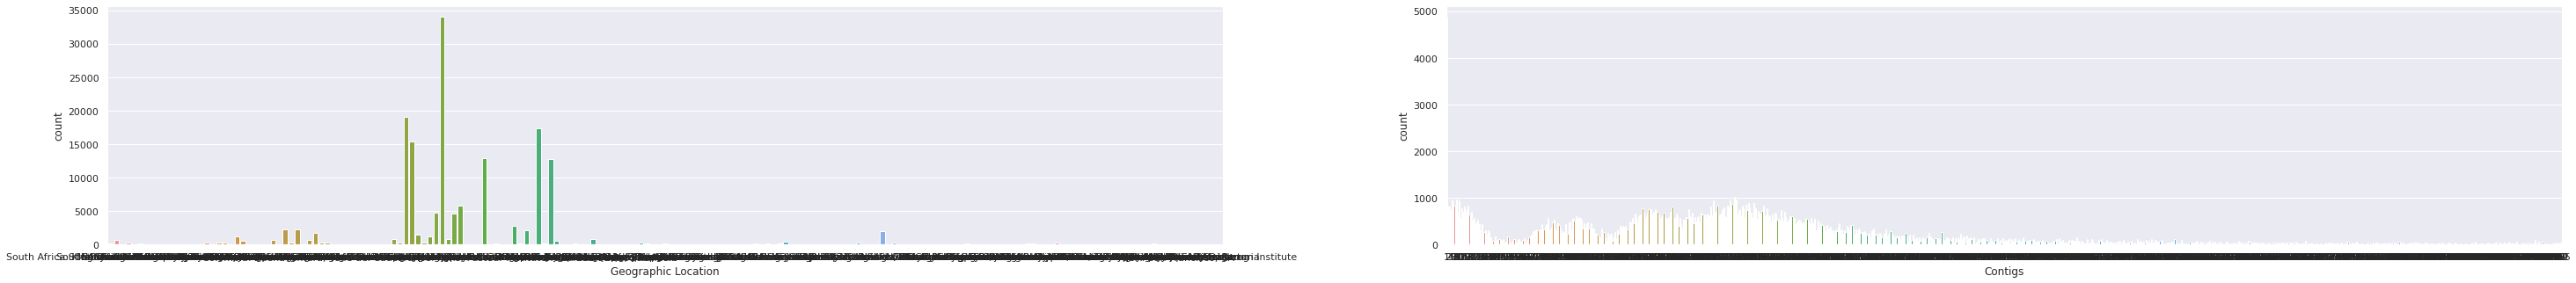

In [31]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize' : (50, 5)})
#Make 2 bar graphs in one go.
fig, axs = plt.subplots(ncols=2)   
sns.countplot(x = df3["Geographic Location"], data = df3, ax = axs[0])
sns.countplot(x = df3['Contigs'], data = df3, ax = axs[1])
plt.show()

**Check correlation between some of the features**

The term "correlation" refers to the statistical association between two variables. A correlation could be positive or negative, indicating that when one variable's value changes, the other variables' values change in the opposite manner.

         Contigs     Size
Contigs  1.00000  0.25032
Size     0.25032  1.00000


[]

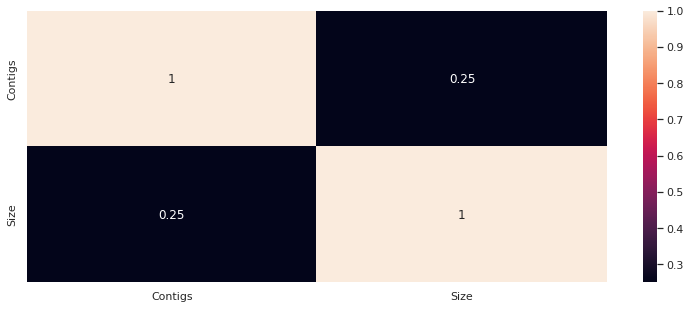

In [32]:
# plot a correlation matrix to check correlations between variables
##Visualize correlation between features.
ax = plt.figure(figsize=(13,5))
corrMatrix = df3.corr()
print(corrMatrix)


ax = sns.heatmap(corrMatrix, annot=True)
plt.plot()



# **As an learning documents**

Algorithms that Support Missing Values like k-nearst neighbor and Naive Bayes is good option ,it can support missing values when making a prediction. we have a variety of possibilities to replacing a missing value, such as: Ignoring and Discarding Data (deleting instances and=or attributes) Parameter Estimation. Maximum likelihood procedures are used to estimate the parameters of a model constant value, such as 0, that is different from all other values. Imputation. Imputation is a class of procedures (replacing missing values with estimated ones) A value from a different record that was chosen at random. The column's mean, median, or mode value.[by the mean (if the attribute is quantitative) or mode (if the attribute is qualitative)]

We conclude from the results that the performance of the classifiers and imputation strategies generally depend on the nature and proportion of missing data
Double-click (or enter) to edit

When ffill() is applied across the index then any missing value is filled based on the corresponding value in the previous row. but because the missing value is more than we expected ????????????:

In [33]:
#newDf.columns
#newDf['Antimicrobial Resistance Evidence'].unique()
#df['Label'].value_counts()
#newDf['Label'].value_counts()
#newDf['Label'] = newDf['Label'].replace('Resistant;Susceptible','Resistant')
#print(newDf)
#newDf['Label'] = newDf['Label'].replace('Resistant;Susceptible','Resistant')
#print(newDf)
#df['Label'] = df['Label'].replace('Resistant;Susceptible','Resistant')
#print(df)
#df['Label'] = df['Label'].replace('Susceptible;Resistant','Susceptible')
#print(df)
# df3=newDf.drop([0], axis = 0)
# print(df3)
# df2=df.drop([0], axis = 0)
# print(df2)

# drop rows with missing values
#newDf.dropna(inplace=True)
#print(f'The dataset has {newDf.shape[1]} columns and {newDf.shape[0]} rows.')

# ***Missing Data with Self organization map***
 SOM is a type of artificial neural network (ANN)

**Normalise Data**

In [34]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=5670bff4641a3de01a5718d60a0fc0db4521651e8ff39a7cdcde4b3a042b2549
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


In [35]:
df3.columns

Index(['Species', 'Contigs', 'Size', 'Geographic Group', 'Geographic Location',
       'Host Gender', 'Host Age', 'Host Health', 'Antibiotic', 'Label'],
      dtype='object')

In [36]:
df3.Label.unique()

array(['Susceptible', 'Resistant', nan, 'Intermediate'], dtype=object)

In [37]:
#Normalise X, input featurees.
 #Importing preprocessing and min-max feature scalling

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from sklearn.compose import make_column_transformer

# x = df3.values
# scaler = MinMaxScaler()
# X_scaler = scaler.fit_transform(X)
# df3_1 = pd.DataFrame(x_scaled)

from sklearn.preprocessing import OneHotEncoder
# preprocessing_data = preprocessing.normalize(X)
# print(preprocessing_dat)
# dfx = df3.copy()
# dfx = dfx.dropna()
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Species','Geographic Group', 'Geographic Location',
       'Host Gender', 'Host Age', 'Host Health', 'Antibiotic',"Label"]),
    remainder='passthrough')

transformed = transformer.fit_transform(df3)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
transformed_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,onehotencoder__x0_Mycobacterium colombiense,onehotencoder__x0_Mycobacterium tuberculosis,onehotencoder__x0_Mycobacterium tuberculosis complex sp. AY1MRC,onehotencoder__x0_nan,onehotencoder__x1_Africa,onehotencoder__x1_Asia,onehotencoder__x1_Europe,onehotencoder__x1_North America,onehotencoder__x1_Oceania,onehotencoder__x1_South America,...,onehotencoder__x6_pyrazinamide,onehotencoder__x6_rifabutin,onehotencoder__x6_rifampin,onehotencoder__x6_streptomycin,onehotencoder__x7_Intermediate,onehotencoder__x7_Resistant,onehotencoder__x7_Susceptible,onehotencoder__x7_nan,Contigs,Size
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,81.0,4313720.0


In [38]:
transformed_df['Contigs'] = transformed_df['Contigs'].astype(float)
transformed_df['Size'] = transformed_df['Size'].astype(float)
transformed_df


,onehotencoder__x0_Mycobacterium colombiense,onehotencoder__x0_Mycobacterium tuberculosis,onehotencoder__x0_Mycobacterium tuberculosis complex sp. AY1MRC,onehotencoder__x0_nan,onehotencoder__x1_Africa,onehotencoder__x1_Asia,onehotencoder__x1_Europe,onehotencoder__x1_North America,onehotencoder__x1_Oceania,onehotencoder__x1_South America,...,onehotencoder__x6_pyrazinamide,onehotencoder__x6_rifabutin,onehotencoder__x6_rifampin,onehotencoder__x6_streptomycin,onehotencoder__x7_Intermediate,onehotencoder__x7_Resistant,onehotencoder__x7_Susceptible,onehotencoder__x7_nan,Contigs,Size
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,81.0,4313720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.0,4356336.0
197085,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.0,4356336.0
197086,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.0,4356336.0
197087,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,167.0,4356336.0


In [39]:
dfx = transformed_df.drop(["onehotencoder__x7_Intermediate",
                           "onehotencoder__x7_Resistant",
                           "onehotencoder__x7_Susceptible",
                           "onehotencoder__x7_nan"] ,axis=1)


dfx

,onehotencoder__x0_Mycobacterium colombiense,onehotencoder__x0_Mycobacterium tuberculosis,onehotencoder__x0_Mycobacterium tuberculosis complex sp. AY1MRC,onehotencoder__x0_nan,onehotencoder__x1_Africa,onehotencoder__x1_Asia,onehotencoder__x1_Europe,onehotencoder__x1_North America,onehotencoder__x1_Oceania,onehotencoder__x1_South America,...,onehotencoder__x6_nicotinamide,onehotencoder__x6_ofloxacin,onehotencoder__x6_para-aminosalicylic acid,onehotencoder__x6_prothionamide,onehotencoder__x6_pyrazinamide,onehotencoder__x6_rifabutin,onehotencoder__x6_rifampin,onehotencoder__x6_streptomycin,Contigs,Size
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,4313720.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,4313720.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,4313720.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,81.0,4313720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,4356336.0
197085,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,4356336.0
197086,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,4356336.0
197087,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,167.0,4356336.0


In [40]:
dfy = transformed_df[["onehotencoder__x7_Intermediate"	,"onehotencoder__x7_Resistant"	,"onehotencoder__x7_Susceptible",	"onehotencoder__x7_nan"]]
dfy

,onehotencoder__x7_Intermediate,onehotencoder__x7_Resistant,onehotencoder__x7_Susceptible,onehotencoder__x7_nan
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
197084,0.0,0.0,1.0,0.0
197085,0.0,0.0,1.0,0.0
197086,0.0,0.0,1.0,0.0
197087,0.0,1.0,0.0,0.0


In [49]:
 #Giving the columns identifiable names
dfy = dfy.rename(columns={0:"onehotencoder__x7_Intermediate", 1:"onehotencoder__x7_Resistant", 2:"onehotencoder__x7_Susceptible", 3: "onehotencoder__x7_nan"})
dfy.head()

,onehotencoder__x7_Intermediate,onehotencoder__x7_Resistant,onehotencoder__x7_Susceptible,onehotencoder__x7_nan
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [50]:
#divide data
X = dfx.values
y = dfy.values
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [51]:
#initializing self organizing map
from minisom import MiniSom
som = MiniSom(x=262 ,y=4,input_len=262,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data = X , num_iteration = 100)

TypeError: ignored

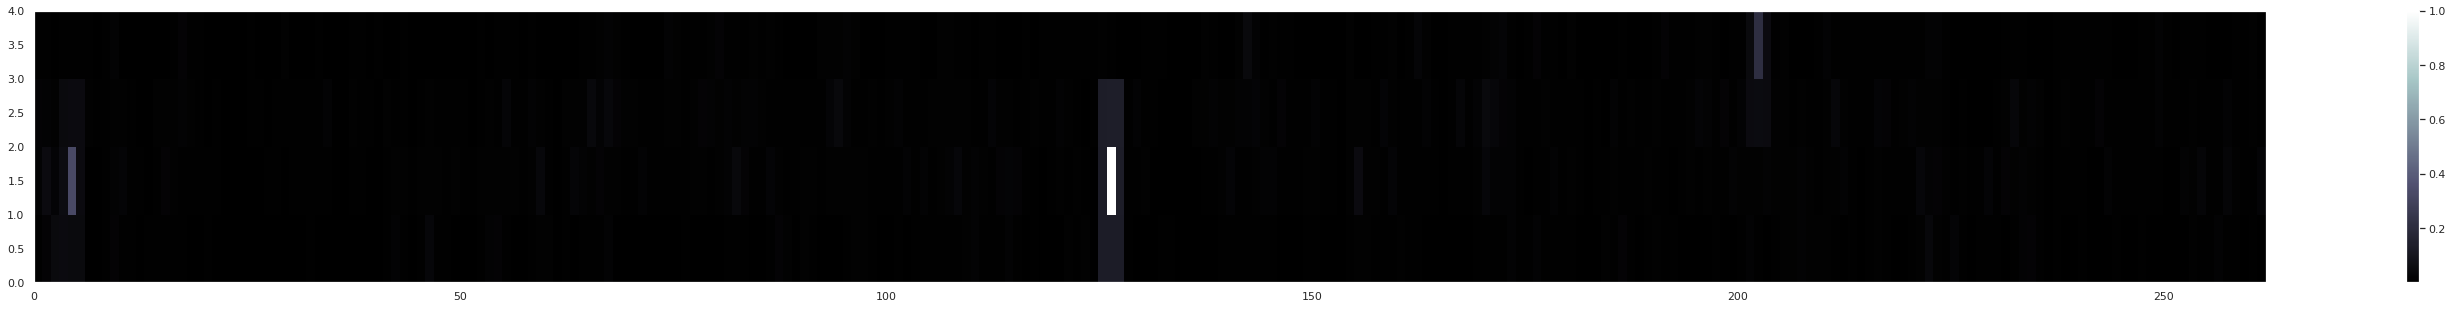

In [55]:
 #visualizing the som
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],
         markeredgecolor=colors[y[i]],
         markersize=10,
         markeredgewidth=2,
         markerfacecolor='None'
         )
show()

In [56]:
#finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)],mappings[(1,2)]),axis=0)
# frauds = sc.inverse_transform(frauds)

In [57]:
frauds.shape

(839, 262)

In [58]:
dfx

,onehotencoder__x0_Mycobacterium colombiense,onehotencoder__x0_Mycobacterium tuberculosis,onehotencoder__x0_Mycobacterium tuberculosis complex sp. AY1MRC,onehotencoder__x0_nan,onehotencoder__x1_Africa,onehotencoder__x1_Asia,onehotencoder__x1_Europe,onehotencoder__x1_North America,onehotencoder__x1_Oceania,onehotencoder__x1_South America,...,onehotencoder__x6_nicotinamide,onehotencoder__x6_ofloxacin,onehotencoder__x6_para-aminosalicylic acid,onehotencoder__x6_prothionamide,onehotencoder__x6_pyrazinamide,onehotencoder__x6_rifabutin,onehotencoder__x6_rifampin,onehotencoder__x6_streptomycin,Contigs,Size
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,4313720.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,4313720.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,4313720.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,81.0,4313720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,4356336.0
197085,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,4356336.0
197086,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,4356336.0
197087,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,167.0,4356336.0


In [60]:
# Recursive Feature Elimination
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 12)
rfe = rfe.fit(df.data, df.target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

TypeError: ignored

# **Missing Data with Imputation**

In [64]:
#SIMPLE Imputation
from sklearn.impute import SimpleImputer

In [69]:
#Specify the strategy to be the median class
fea_transformer = SimpleImputer(strategy="median")
values = fea_transformer.fit_transform(transformed_df)
pd.DataFrame(values)

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,81.0,4313720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.0,4356336.0
197085,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.0,4356336.0
197086,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.0,4356336.0
197087,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,167.0,4356336.0


In [71]:
from sklearn.impute import KNNImputer
# I specify the nearest neighbor to be 3 
fea_transformer = KNNImputer(n_neighbors=3)
values = fea_transformer.fit_transform(transformed_df)
pd.DataFrame(values)

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,4313720.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,81.0,4313720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.0,4356336.0
197085,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.0,4356336.0
197086,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.0,4356336.0
197087,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,167.0,4356336.0


**Editing Features**

The unique values that are not mentioned in the dataset description will be moved into the “Other” value, since they appear very infrequently in the dataset

In [ ]:
#Change categorical values by replacing them.
# df['Host Gender'].replace([0,1],2, inplace=True) 
#4 = Other
#df["Marriage"].replace(0, 3, inplace=True) #3 = Other
#Check outcome.
#print(f'"Host Age" has discrete values of {df["Host Age"].unique()}, {len(df["Host Age"].unique())} values in total.')
#print(f'Marriage has discrete values of {df["Marriage"].unique()}, {len(df["Marriage"].unique())} values in total.')
#Categorical values.
#category = ['Sex', "Host Age", 'Marriage','PayStat_April']
#Create dataframe for each categorical feature.
#sex = pd.get_dummies(df['Sex'], prefix = 'Sex')
#education = pd.get_dummies(df["Host Age"], prefix = "Host Age")
#marriage = pd.get_dummies(df['Marriage'], prefix = 'Marriage')
#september = pd.get_dummies(df['PayStat_September'], prefix = 'PayStat_September') august = pd.get_dummies(df['PayStat_August'], prefix = 'PayStat_August')
#july = pd.get_dummies(df['PayStat_July'], prefix = 'PayStat_July')
#Remove original features.
#df = df.drop(category, axis = 1)
#Add the new dataframes into the original dataframe.
#df_tmp = [df, sex, education, marriage, september, august, july, june, may, april] df = pd.concat(df_tmp, axis = 1)

Check new features that were added.
df.columns

# **Sampling Methods**

In [ ]:
 #Function to cluster dataframe and returned sampled dataframe.
#def cluster(clusters, dataframe, fraction, replace):
#Cluster dataframe.
#kmeans = KMeans(n_clusters = clusters, random_state = 1906814).fit(dataframe); 
#dataframe['Cluster'] = kmeans.predict(dataframe)
#Empty dataframe to store sampled data.
#clusters_df = pd.DataFrame()
#Sample each cluster and add it to the empty dataframe.
#for i in range(clusters):
#c = dataframe[dataframe.Cluster == i].copy(); 
#c = c.sample(frac = fraction, random_state = 1906814, replace = replace)
#clusters_df = pd.concat([c, clusters_df])
#Drop the Cluster column.
#clusters_df.drop(['Cluster'], axis = 1, inplace = True) #Return sampled dataframe
    #return clusters_df

we use the randome_state to getsame out come or result from  processing of same model . using the randome_state provide same result 

## **Prepare Features**

In [ ]:
#Store default feature.
Y = df["Label"]
#Store the rest of the features.
X = small_df. drop("Label", axis = 1) 
#Check X and Y data types.
print(type(X))
print(type(Y))

**Note that we cannot use a dataset with NaN values for k-fold cross validation**

# **Split the Dataset**


here is no best value for seed. It depends on the data
#Split X and Y into testing and training set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 10116) 
different random state then mean_squared_error will be different every time.
in randomforest using the randome-state provide when building trees and the sampling of the features to consider when looking for the best split at each node.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 10116)


# **Modelling / Classification**


*  Build Model
*  Create and Train Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn import LogisticRegressionclassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
 #Create RandomForestClassifier with default parameters.
RF = RandomForestClassifier(random_state = 10116 )
 #Fit the training data into the model. 
RF.fit(X_train, Y_train)
RandomForestClassifier(random_state=10116 )
 

# **Make Predictions**

In [ ]:
 #Predict using testing set.
rf_predict = rf.predict(X_test)
 #Prediction probabilities.
rf_probs = rf.predict_proba(X_test)
clf = RandomForestClassifier(max_depth=2, random_state=10116)
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))
[1]

In [ ]:


names = ["Decision Tree", "Random Forest", "Neural Net","SVM" , "AdaBoostClassifier", "GradientBoostingClassifier" ]

classifiers = [ DecisionTreeClassifier(),RandomForestClassifier() , MLPClassifier()]

score = 0
for name, clf in zip(names, classifiers):
    if name == "Decision Tree":
        clf = DecisionTreeClassifier(random_state=0)
        grid_search = GridSearchCV(clf, param_grid=param_grid_DT)
        grid_search.fit(X_train, y_train_TF)
        if grid_search.best_score_ > score:
            score = grid_search.best_score_
            best_clf = clf
    elif name == "Random Forest":
        clf = RandomForestClassifier(random_state=0)
        grid_search = GridSearchCV(clf, param_grid_RF)
        grid_search.fit(X_train, y_train_TF)
        if grid_search.best_score_ > score:
            score = grid_search.best_score_
            best_clf = clf

    elif name == "Neural Net":
        clf = MLPClassifier()
        clf.fit(X_train, y_train_TF)
        y_pred = clf.predict(X_test)
        current_score = accuracy_score(y_test_TF, y_pred)
        if current_score > score:
            score = current_score
            best_clf = clf

    elif name == "SVM":
        clf = SVM()
        clf.fit(X_train, y_train_TF)
        y_pred = clf.predict(X_test)
        current_score = accuracy_score(y_test_TF, y_pred)
        if current_score > score:
            score = current_score
            best_clf = clf


pkl_filename = "pickle_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(best_clf, file)

from sklearn.externals import joblib
# Save to file in the current working directory
joblib_file = "joblib_model.pkl"  
joblib.dump(best_clf, joblib_file)

print("best classifier: ", best_clf, " Accuracy= ", score)

# **Results**
Get the overall accuracy of the model.

In [ ]:
 #Get model accuracy
accuracy = accuracy_score(Y_test, rf_predict)
#Print accuracy
print(f'The accuracy of the Random Forest model is {np.round(accuracy * 100, 2)}%')

# **Evaluate Model**


#Show classification report.
print(classification_report(Y_test, rf_predict))

In [ ]:
 #Create a heatmap for the confusion matrix
heat_map = sns.heatmap(confusion_matrix(Y_test, rf_predict), annot = True, fmt = "d")


## **Results Analysis**
# **Solution Improvement**
**Tune Parameters**
When building the Random Forest Classifier it can be given parameters and adjusting these pa- rameters can lead to improvement in performance.

In [ ]:
#  accuracy_list = []
# for i in range(1, 1001):
#     #Make random forest.
# rf = RandomForestClassifier(random_state = 1906814, n_estimators = i)
#  #Store default feature.
# Y = df['Label']
# #Store the rest of the features.
# X = df.drop('Label', axis = 1)
# #Normalize X, input features.
# X = preprocessing.normalize(X)
# #Split X and Y into testing and training set.
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state =␣
# 􏰀→1906814)
# #Fit the training data into the model. rf.fit(X_train, Y_train)
# #Predict using testing set.
# rf_predict = rf.predict(X_test)
# #Get model accuracy
# accuracy = accuracy_score(Y_test, rf_predict) #Add accuracy to the list. accuracy_list.append(accuracy)
# #Sort the list then get highest accuracy and number of estimators.
# sort_list = sorted(accuracy_list, reverse = True)
# estimators = accuracy_list.index(sort_list[0]) + 2
# #Print
# # print("Number of estimators: " + str(estimators) + " has highest accuracy of " +␣
# 􏰀→str(sort_list[0]) + "%")

## **Using Different Metrics for Evaluation**

A function is created to easily predict the data and return the model’s accuracy.

In [ ]:
# from sklearn.metrics import mean_squared_error
#Function to model the data.
# def sampling(dataframe, testsize):
# #Store default feature.
# Y = dataframe['?????']
# #Store the rest of the features.
# X = dataframe.drop('???????', axis = 1)
# #Normalize X, input features.
# X = preprocessing.normalize(X)
# #Split X and Y into testing and training set.
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = testsize, random_state␣
# 􏰀→= 1906814)
# #Fit the training data into the model. rf.fit(X_train, Y_train)
# #Predict using testing set.
# rf_predict = rf.predict(X_test)
# #Get model accuracy
# accuracy = accuracy_score(Y_test, rf_predict) #Return accuracy

# return np.round(accuracy * 100, 2)

# **Undersampling**

As discussed before undersampling will reduce the size of the no default records to match the default records. However, the cost of this method is that data is lost. The optimal number of clusters will be found, so that a higher accuracy for the model will be found. Range from 2 to 31 cluster size will be tested since the no default data is large.

In [ ]:
#  accuracy_list = []
# for i in range(2, 31):
#     #Make two dataframes, one each classification
# default = df[df.???????? == 1].copy(); noDefault = df[df.?????????/ == 0].copy()
#     #Sample the no default data and combine the two dataframes.
# noDefault = cluster(i, noDefault, 0.33, False) undersampled_df = pd.concat([default, noDefault])
#  #Add accuracy to the list. accuracy_list.append(sampling(undersampled_df, 0.25))
# #Sort the list then get highest accuracy and number of clusters for it.
# sort_list = sorted(accuracy_list, reverse = True)
# number_of_clusters = accuracy_list.index(sort_list[0]) + 2
# #Print
# print("Number of cluster: " + str(number_of_clusters) + " has highest accuracy of " +␣
# 􏰀→str(sort_list[0]) + "%")

# **Oversampling**
For oversampling the size of the default data will be increased to closely match the size of no default, ratio 1:1. Oversampling has the benefit of not losing data unlike undersampling, however the data will just be duplicated. The default data will be duplicat 2 times, so the size will be 3 times the original.

In [ ]:
 #Print accuracy
print(f'The accuracy of the Random Forest model with oversampling is {sampling(oversampled_df, 0. 􏰀→25)}%')

According to the results oversampling did improve the model, accuracy increased by 13%. There- fore in this scenario oversampling is better for the model’s accuracy than undersampling. Balanc- ing the data with oversampling is best.

## **Combination**

A combination of undersampling and oversampling may yield better results compared to only using oversampling. Again cluster size of 2 to 31 will used to find the best possible accuracy. The aim will be to keep dataset size the same (30000 records) while trying to have 1:1 ratio of classification.

In [ ]:
#  accuracy_list = []
# for i in range(2, 31):
#     #Make two dataframes, one each classification
# default = df[df.Default_October == 1].copy(); 􏰀→copy()
#     #Sample the no default default data.
# noDefault = df[df.Default_October == 0].
# noDefault = cluster(i, noDefault, 0.66, False) #Sample the no default default data.
# oversample = cluster(i, default, 0.5, False) default = pd.concat([default, default, oversample]) default.drop(['Cluster'], axis = 1, inplace = True) #Combine dataframes.
# combination_df = pd.concat([default, noDefault]) #Add accuracy to the list. accuracy_list.append(sampling(combination_df, 0.25))
# #Sort the list then get highest accuracy and number of clusters for it.
# sort_list = sorted(accuracy_list, reverse = True)
# number_of_clusters = accuracy_list.index(sort_list[0]) + 2
# #Print
# print("Number of cluster: " + str(number_of_clusters) + " has highest accuracy of " +␣
# 􏰀→str(sort_list[0]) + "%")

# **Compare With Different Models**
Even thought Random Forest is considered one of the best models, it necessarily might not be the best for this particular dataset. Therefore other classifiers will be built to compare with our current model. The some of the chosen classifiers are similar to the ones used in the peer-reviewed paper and the others are common classifiers. They will be compared not through accuracy but their f1-score and a ROC plot

In [ ]:
#  #Store the classifiers
# classifiers = [MLPClassifier(max_iter = 1000, random_state = 1906814),
#                DecisionTreeClassifier(random_state = 1906814),
#                AdaBoostClassifier(random_state = 1906814),
#                GaussianNB(),
#                rf
# ]
# #Store the model results into a dataframe.
# results = pd.DataFrame(columns=['classifiers','fpr','tpr','auc']) #Train the models and store the results.
# for cls in classifiers:
# #Fit the data
# model = cls.fit(X_train, Y_train)
# #Get probabilites.
# probability = model.predict_proba(X_test)[::,1]
# #Set the columns.
# fpr, tpr, thres = roc_curve(Y_test, probability)
# #Get the area under the curve.
# auc = roc_auc_score(Y_test, probability)
# #Add the results to dataframe.
# results = results.append({'classifiers':cls.__class__.__name__,
# #Set names
#   'fpr':fpr,
#   'tpr':tpr,
#   'auc':auc
# }, ignore_index = True)
# results.set_index('classifiers', inplace = True) #Create the plot
# fig = plt.figure(figsize = (8, 6))
# #Loop the results and plot the performance.
# for i in results.index:
#     plt.plot(results.loc[i]['fpr'],
#              results.loc[i]['tpr'],
# label="{}, AUC={:.3f}".format(i, results.loc[i]['auc'])) #Plot the random model.
# plt.plot([0,1], [0,1], color='orange', linestyle='--') #False Positive.
# plt.xticks(np.arange(0.0, 1.1, step=0.1)) plt.xlabel("False Positive Rate", fontsize=15)
# #True Positive.
# plt.yticks(np.arange(0.0, 1.1, step=0.1)) plt.ylabel("True Positive Rate", fontsize=15) #ROC Curve.
# plt.title('ROC Curve Analysis', fontsize=12) plt.legend(prop={'size':13}, loc='lower right') #Show the plot.
plt.show()

According to the graph the AdaBoost classifier is the best model to use for this dataset. It is only slightly better than the Random Forest classifier, however with some tuning the Random Forest can perform better.

## **Change the Partitioning of the Data**

Another way to improve the model is to use K fold cross-validation to get the average accuracy of the model. This method guarantees that all iterations of a split are tested. From 10% to 33% testing data split will be tested. The results will show the optimal training / testing size for the data, with over and under fitting taken into consideration.

In [ ]:
#  for i in range(3, 11):
#     kfold = KFold(n_splits = i)
#     score = cross_val_score(rf, X, Y, cv = kfold, scoring = "accuracy").mean()
#     print(f'Using {100 / i}% for testing, mean accuracy: {round(score * 100, 2)}%')

The results show that from 10% to 33% testing size has around 81% accuracy. If the testing size is reduced further from 10% the model will have a High Variance (overfitting) and increasing the testing size above 33% will result in the model having a High Bias (Overfitting).

## **Final Model**

based on most of the literature reviews , need to test various methods to improve the Random Forest’s performance. The following shows the best version of the model for this dataset.

In [ ]:
corona = pd.read_excel("/content/20221202covid19infectionsurveydatasetsengland (1).xlsx")
corona.head()